In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv('/content/drive/MyDrive/TESIS_PYTHON/ACTIVIDADFISICA/ActividadFisica.csv')

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#df.sample(14)

Visualizacion de datos

No Saludable    177
Saludable       146
Name: Diagnostico, dtype: int64


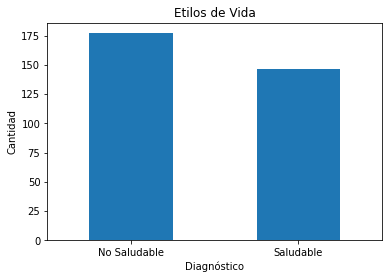

In [33]:
#Exploración de datos: Cantidad de datos de la clase de la variable de salida
clases=pd.value_counts(df['Diagnostico'], sort=True)
print(clases)
clases.plot(kind='bar', rot=0)
plt.title('Etilos de Vida')
plt.ylabel('Cantidad')
plt.xlabel('Diagnóstico')
LABELS=np.array(['No Saludable','Saludable'])
plt.xticks(range(2),LABELS)
plt.show()

**Procesamiento de Datos**

In [34]:
#Verificación de datos faltantes
contador=df.isnull().sum()
contador

edad             0
sexo             0
e_profesional    0
c_academico      0
trabaja          0
e_civil          0
a_moderadas      0
a_intensas       0
f_muscular       0
f_tendones       0
f_televisor      0
t_caminar        0
Diagnostico      0
dtype: int64

In [35]:
#Eliminación de columnas no relevantes
df.drop(['edad','sexo','e_profesional','c_academico','trabaja','e_civil'], axis = 1, inplace=True)

In [36]:
df.columns

Index(['a_moderadas', 'a_intensas', 'f_muscular', 'f_tendones', 'f_televisor',
       't_caminar', 'Diagnostico'],
      dtype='object')

In [37]:
#Valores únicos de una de las características: v_frutas
pd.unique(df['a_moderadas'])

array(['2 h y 30 min a 5 h', 'Menos de 2 h y 30 min', 'Más de 5 h'],
      dtype=object)

In [38]:
#Acitividad Física: Reemplazando con valores ordinales
df['a_moderadas'].replace(('Menos de 2 h y 30 min','2 h y 30 min a 5 h', 'Más de 5 h'),(0,1,2), inplace = True)
df['a_intensas'].replace(('Menos de 1 h y 15 min', '1 h y 15 min a 2 h y 30 min','Más de 2 h y 30 min'),(0,1,2), inplace = True)
df['f_muscular'].replace(('Menos de 2 días', 'Igual a 2 días', 'Más de 2 días'),(0,1,2), inplace = True)
df['f_tendones'].replace(('Ninguno','Menos de 15 s', '15 a 30 s','Más 30 s'),(0,1,2,3), inplace =  True)
df['f_televisor'].replace(('2 h', 'Menos de 4 h', '4 a 7 h', '7 a 10 h','Más de 10 h'),(4,3,2,1,0), inplace = True)
df['t_caminar'].replace(('Menos de 30 min', '30 min','Más de 30 min'),(0,1,2), inplace = True)
#Target: Reemplazando con valores binarios
df['Diagnostico'].replace(('No Saludable', 'Saludable'),(0,1),inplace = True)

In [39]:
#Visualización de tipo de datos, todos debe ser numéricos
df.dtypes

a_moderadas    int64
a_intensas     int64
f_muscular     int64
f_tendones     int64
f_televisor    int64
t_caminar      int64
Diagnostico    int64
dtype: object

In [40]:
df.head()

,a_moderadas,a_intensas,f_muscular,f_tendones,f_televisor,t_caminar,Diagnostico
0,1,0,0,1,0,1,0
1,1,2,2,3,0,0,1
2,0,0,0,2,0,0,0
3,0,0,0,1,0,0,0
4,2,0,0,3,0,1,0


In [41]:
#Separación de atributos y la variable de salida
from sklearn.model_selection import train_test_split
x = df.drop(['Diagnostico'],axis=1)
y = df[['Diagnostico']]

In [42]:
#Separación de datos para etapas de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=5)
len(x_train)

258

In [43]:
#Cantidad de la clase del target antes del Sobremuestreo
before_train = pd.value_counts(y_train['Diagnostico'], sort=True)
before_train

0    140
1    118
Name: Diagnostico, dtype: int64

In [44]:
pd.value_counts(df['Diagnostico'], sort= True)

0    177
1    146
Name: Diagnostico, dtype: int64

**Balanceo de Datos: Met. Sobremuestreo**

In [45]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
x_train_os, y_train_os = os.fit_resample(x_train, y_train)
balanceado=pd.value_counts(y_train_os['Diagnostico'], sort=True)
print(balanceado)

1    140
0    140
Name: Diagnostico, dtype: int64


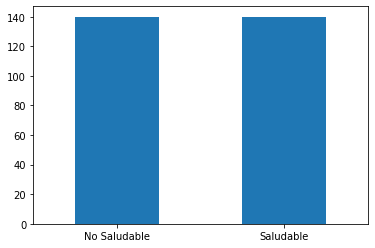

In [46]:
#Se juntó en un dataframe los resultados
df_balanceado = pd.DataFrame(data=x_train_os, columns=df.drop(['Diagnostico'], axis=1).columns)
df_balanceado['Diagnostico']=y_train_os
clases=pd.value_counts(df_balanceado['Diagnostico'], sort=True)
clases.plot(kind="bar", rot=0)
LABELS=np.array(['No Saludable','Saludable'])
plt.xticks(range(2), LABELS)
plt.show()

**Selección de Características: Filtros de correlación** 

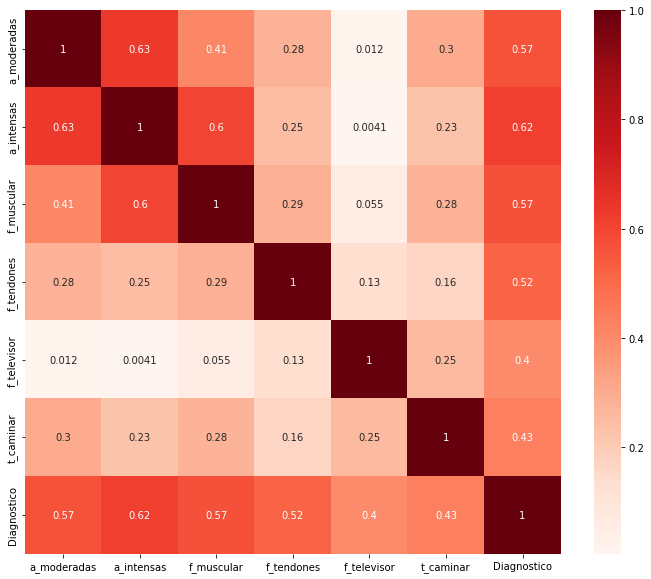

In [47]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=df_balanceado.corr()
sns.heatmap (cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [48]:
#Almacenando los valores de correlación con respecto a
#la variable de salida Diagnóstico
correlacion=abs(cor["Diagnostico"])
correlacion


a_moderadas    0.566395
a_intensas     0.615315
f_muscular     0.568941
f_tendones     0.517977
f_televisor    0.398179
t_caminar      0.433676
Diagnostico    1.000000
Name: Diagnostico, dtype: float64

In [49]:
#Realización de filtro de los atributos que posean un grado de
#correlación mayor a 0.5
car_relevantes = correlacion[correlacion>0.5]
car_relevantes

a_moderadas    0.566395
a_intensas     0.615315
f_muscular     0.568941
f_tendones     0.517977
Diagnostico    1.000000
Name: Diagnostico, dtype: float64

In [50]:
#Verificación de la correlación de las variables seleccionadas
df_balanceado[['a_moderadas','a_intensas','f_muscular','f_tendones']].corr()

,a_moderadas,a_intensas,f_muscular,f_tendones
a_moderadas,1.000000,0.631515,0.409631,0.283158
a_intensas,0.631515,1.000000,0.600130,0.246957
f_muscular,0.409631,0.600130,1.000000,0.287250
f_tendones,0.283158,0.246957,0.287250,1.000000


In [51]:
df_seleccion = df_balanceado[['a_moderadas','a_intensas','f_muscular','f_tendones','Diagnostico']]
df_seleccion.to_csv('/content/drive/MyDrive/TESIS_PYTHON/ACTIVIDADFISICA/balanced_activity_selection.csv', index=False)

In [52]:
#Exportación del dataset de prueba
df_prueba = pd.DataFrame(data=x_test, columns=df.drop(['Diagnostico'], axis=1).columns)
df_prueba['Diagnostico']=y_test
df_prueba.to_csv('/content/drive/MyDrive/TESIS_PYTHON/ACTIVIDADFISICA/activity_test.csv', index= False)

CROSS VALIDATION

In [53]:
x = df_seleccion.drop(['Diagnostico'], axis=1)
y = df_seleccion['Diagnostico']

In [54]:
from sklearn.svm import SVC
SVC = SVC(gamma='auto', C=2.0, kernel='linear')
from sklearn.model_selection import cross_val_score

SVC.fit(x,y)
print(SVC.score(x,y))
print(cross_val_score(SVC, x,y, cv=5).mean())

0.875
0.8714285714285713


In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

print(knn.score(x,y))
print(cross_val_score(knn, x,y, cv=5).mean())

0.8928571428571429
0.8678571428571429


In [56]:
from sklearn import tree
tr = tree.DecisionTreeClassifier(max_depth=10)
tr.fit(x,y)

print(tr.score(x,y))
print(cross_val_score(tr, x,y, cv=5).mean())

0.9071428571428571
0.825
